# Predict the Automobile Insurance claim(project dynamics-11)

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import scipy
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

# Sub-Project- 1(Predicting Claim Amount)

In [2]:
data1=pd.read_csv('autoclaim.csv',parse_dates=['Effective To Date'])
data1
# The purpose of an Insurance is to provide protection against the risk of any financial loss. 
# Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. 
# Here we will be provided with Automobile insurance claim dataset.
# One has to predict the claim amount in the Automobile insurance dataset

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2011-02-10,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2011-02-12,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2011-02-06,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2011-02-03,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [3]:
df1=pd.DataFrame(data=data1)
df1.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


# Data Pre-Processing 

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   Country                        9134 non-null   object        
 2   State Code                     9134 non-null   object        
 3   State                          9134 non-null   object        
 4   Claim Amount                   9134 non-null   float64       
 5   Response                       9134 non-null   object        
 6   Coverage                       9134 non-null   object        
 7   Education                      9134 non-null   object        
 8   Effective To Date              9134 non-null   datetime64[ns]
 9   EmploymentStatus               9134 non-null   object        
 10  Gender                         9134 non-null   object        
 11  Income           

In [5]:
df1['Country'].unique()

array(['US'], dtype=object)

In [208]:
# so we can drop this column

In [7]:
le=LabelEncoder()
df1['State Code']=le.fit_transform(df1['State Code'])

In [8]:
for i in df1['State Code'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['KS']
3=['NE']
4=['OK']
2=['MO']
0=['IA']


In [9]:
df1['State'].unique()

array(['Kansas', 'Nebraska', 'Oklahoma', 'Missouri', 'Iowa'], dtype=object)

In [10]:
df1['State']=le.fit_transform(df1['State'])
for i in df1['State'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['Kansas']
3=['Nebraska']
4=['Oklahoma']
2=['Missouri']
0=['Iowa']


In [11]:
df1['Response'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
df1['Response']=le.fit_transform(df1['Response'])

In [13]:
for i in df1['Response'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['No']
1=['Yes']


In [14]:
df1['Coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [15]:
df1['Coverage']=le.fit_transform(df1['Coverage'])

In [16]:
for i in df1['Coverage'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['Basic']
1=['Extended']
2=['Premium']


In [17]:
df1['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [18]:
df1['Education']=le.fit_transform(df1['Education'])

In [19]:
for i in df1['Education'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['Bachelor']
1=['College']
4=['Master']
3=['High School or Below']
2=['Doctor']


In [20]:
df1['EmploymentStatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [21]:
df1['EmploymentStatus']=le.fit_transform(df1['EmploymentStatus'])

In [22]:
for i in df1['EmploymentStatus'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['Employed']
4=['Unemployed']
2=['Medical Leave']
0=['Disabled']
3=['Retired']


In [23]:
df1['Gender']=le.fit_transform(df1['Gender'])

In [24]:
for i in df1['Gender'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['F']
1=['M']


In [25]:
df1['Location Code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [26]:
df1['Location Code']=le.fit_transform(df1['Location Code'])

In [27]:
for i in df1['Location Code'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['Suburban']
0=['Rural']
2=['Urban']


In [28]:
df1['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [29]:
df1['Marital Status']=le.fit_transform(df1['Marital Status'])

In [30]:
for i in df1['Marital Status'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['Married']
2=['Single']
0=['Divorced']


In [31]:
df1['Policy Type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [32]:
df1['Policy Type']=le.fit_transform(df1['Policy Type'])

In [33]:
for i in df1['Policy Type'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['Corporate Auto']
1=['Personal Auto']
2=['Special Auto']


In [34]:
df1['Policy'].unique()

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object)

In [35]:
df1['Policy']=le.fit_transform(df1['Policy'])

In [36]:
for i in df1['Policy'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

2=['Corporate L3']
5=['Personal L3']
1=['Corporate L2']
3=['Personal L1']
7=['Special L2']
0=['Corporate L1']
4=['Personal L2']
6=['Special L1']
8=['Special L3']


In [37]:
df1['Claim Reason'].unique()

array(['Collision', 'Scratch/Dent', 'Hail', 'Other'], dtype=object)

In [38]:
df1['Claim Reason']=le.fit_transform(df1['Claim Reason'])
for i in df1['Claim Reason'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['Collision']
3=['Scratch/Dent']
1=['Hail']
2=['Other']


In [39]:
df1['Sales Channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [40]:
df1['Sales Channel']=le.fit_transform(df1['Sales Channel'])
for i in df1['Sales Channel'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['Agent']
2=['Call Center']
3=['Web']
1=['Branch']


In [41]:
df1['Vehicle Class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [42]:
df1['Vehicle Class']=le.fit_transform(df1['Vehicle Class'])
for i in df1['Vehicle Class'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

5=['Two-Door Car']
0=['Four-Door Car']
3=['SUV']
2=['Luxury SUV']
4=['Sports Car']
1=['Luxury Car']


In [43]:
df1['Vehicle Size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [44]:
df1['Vehicle Size']=le.fit_transform(df1['Vehicle Size'])
for i in df1['Vehicle Size'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['Medsize']
2=['Small']
0=['Large']


In [46]:
df2=df1.drop(['Customer','Country','Effective To Date'],axis=1)
df2.shape
# lets drop these column 

(9134, 23)

# EDA - Univariate Analysis

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44df24c88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44df24a08>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44df24fc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44df24b88>}

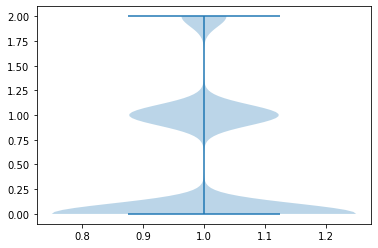

In [47]:
plt.violinplot(df2['Coverage'])
# most of the customers are having 'basic' insurance package 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44dfefc88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44dfef908>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44dff8d48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44dffb488>}

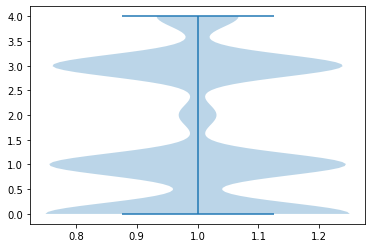

In [48]:
plt.violinplot(df2['Education'])
# most of the applicants have education background up to 'batchelor', 'college', 'high school' while 'doctors' or 'masters' are less

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44e06bdc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44e06ba48>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44e074ec8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44e078608>}

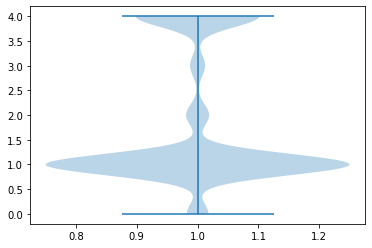

In [49]:
plt.violinplot(df2['EmploymentStatus'])
# most of the applicants are 'employed'

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44e0dfd88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44e0dfa88>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44e0e6e88>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44e0ea5c8>}

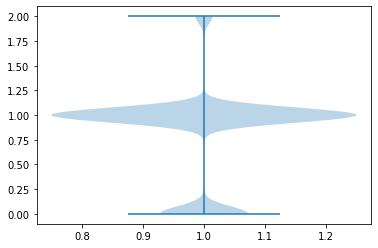

In [50]:
plt.violinplot(df2['Policy Type'])
# most of the insurances are of 'personal-auto' category

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44e153a48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44e1537c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44e15cac8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44e15cfc8>}

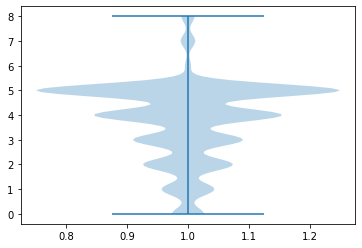

In [51]:
plt.violinplot(df2['Policy'])
# 'personal L3' plicies are more than any other type of policies

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44e1c0d88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44e1c0a08>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44e1c6fc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44e1ca708>}

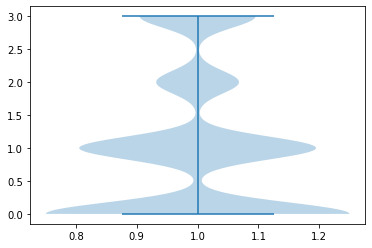

In [52]:
plt.violinplot(df2['Claim Reason'])
# 'collision' is the moajor reason observed as the reason of claim

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44e22f7c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44e22f548>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44e2368c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44e236fc8>}

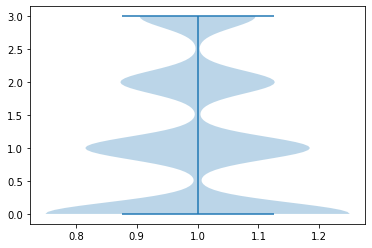

In [53]:
plt.violinplot(df2['Sales Channel'])
# most of the deals of insurance happened through 'agent' or 'branch'

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44e29c748>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44e29c4c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44e29f7c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44e29fec8>}

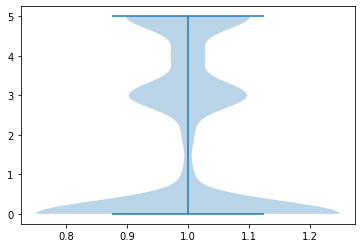

In [54]:
plt.violinplot(df2['Vehicle Class'])
# 'four door car'is having the maximum number insurance coverage applcation among others 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44e3080c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44e2ee6c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44e308e88>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44e30e788>}

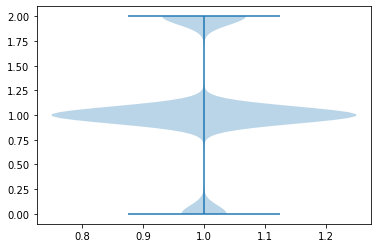

In [55]:
plt.violinplot(df2['Vehicle Size'])
# most of insurances are for 'midsized' cars

{'whiskers': [<matplotlib.lines.Line2D at 0x1f44e36d308>,
 'caps': [<matplotlib.lines.Line2D at 0x1f44e381fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f44e378d08>],
 'medians': [<matplotlib.lines.Line2D at 0x1f44e384fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f44e38de48>],
 'means': []}

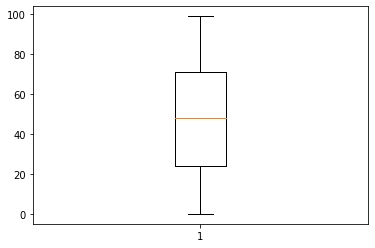

In [56]:
plt.boxplot(df2['Months Since Policy Inception'])
# months since policy coverage statrted - minimum of 20 months, maximum of 70 months and on average of 45 months 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44f3bb3c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44f3b2f88>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44f3bf448>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44f3bfb08>}

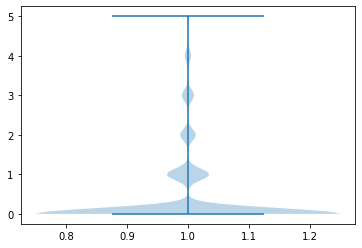

In [57]:
plt.violinplot(df2['Number of Open Complaints'])
# Number of open complaints are very negligible and pertains to zero in most of the cases

# EDA - BiVariate Analysis

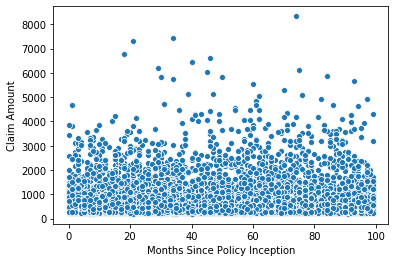

In [58]:
sns.scatterplot(data=df2,x='Months Since Policy Inception',y='Claim Amount')
# through scatter plat we can claim amount is more or less distributed among all month durantion of coverage. 

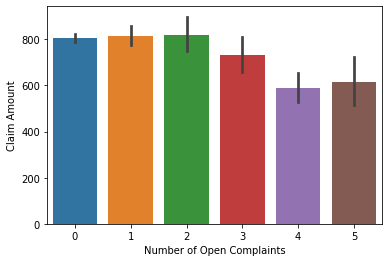

In [59]:
sns.barplot(data=df2,x='Number of Open Complaints',y='Claim Amount')

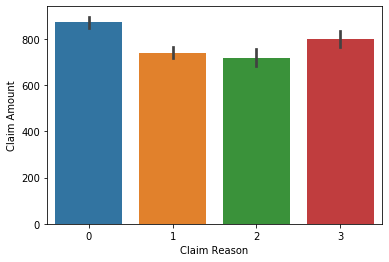

In [60]:
sns.barplot(data=df2,x='Claim Reason',y='Claim Amount')
# insurance has been claimed for all category reason while 'collision' being the dominant among others

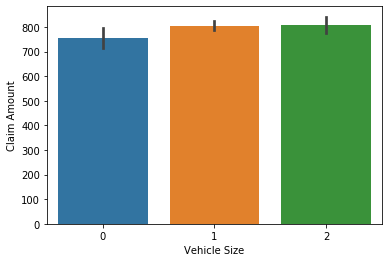

In [61]:
sns.barplot(data=df2,x='Vehicle Size',y='Claim Amount') # small cars are more prone to claim insurance

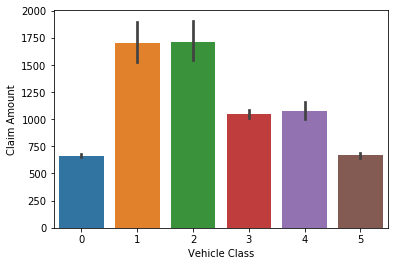

In [62]:
sns.barplot(data=df2,x='Vehicle Class',y='Claim Amount') 
# 'Luxary car' & 'luxary SUV' are found to be claiming more amount of claim 

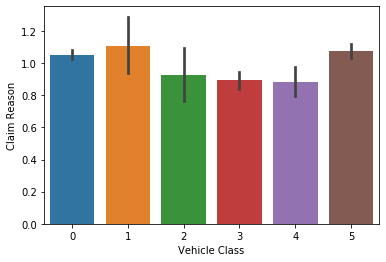

In [63]:
sns.barplot(data=df2,x='Vehicle Class',y='Claim Reason')

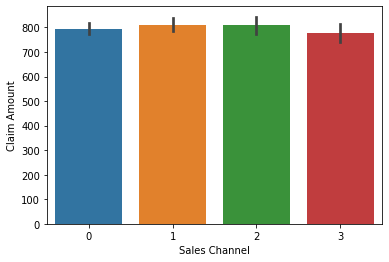

In [65]:
sns.barplot(data=df2,x='Sales Channel',y='Claim Amount')
# sales that happened through 'web' are having more claims

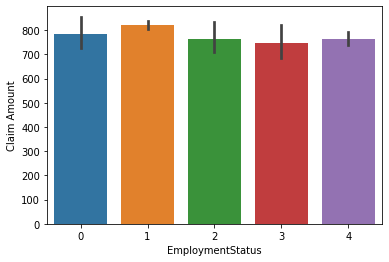

In [66]:
sns.barplot(data=df2,x='EmploymentStatus',y='Claim Amount')
# checking the employmentstatus against amount of claim

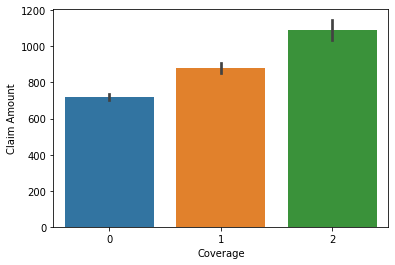

In [67]:
sns.barplot(data=df2,x='Coverage',y='Claim Amount')
# claim amount for the 'premium' packages are found to be highest

# Cleaning The Dataset for Model Training


In [68]:
z=np.abs(zscore(df2))
print(np.where(z>3))

(array([  31,   50,   51,   79,   86,  125,  181,  185,  196,  196,  232,
        243,  244,  248,  248,  266,  274,  281,  292,  303,  315,  316,
        373,  375,  385,  386,  403,  404,  404,  407,  408,  418,  425,
        435,  444,  496,  496,  510,  512,  522,  522,  541,  541,  554,
        581,  581,  626,  633,  645,  680,  681,  702,  727,  749,  755,
        757,  810,  814,  817,  820,  832,  832,  832,  836,  840,  856,
        869,  873,  888,  888,  899,  914,  926,  944,  949, 1002, 1008,
       1011, 1046, 1046, 1058, 1071, 1078, 1078, 1109, 1113, 1120, 1133,
       1158, 1174, 1179, 1184, 1200, 1212, 1233, 1240, 1283, 1292, 1292,
       1300, 1305, 1312, 1312, 1319, 1330, 1364, 1382, 1383, 1383, 1384,
       1392, 1393, 1408, 1421, 1429, 1436, 1466, 1504, 1506, 1516, 1516,
       1521, 1529, 1534, 1541, 1552, 1552, 1555, 1558, 1592, 1626, 1640,
       1657, 1687, 1795, 1796, 1796, 1809, 1812, 1819, 1819, 1823, 1824,
       1850, 1858, 1858, 1859, 1861, 1881, 1881, 1

In [69]:
df2n=df2[(z<3).all(axis=1)]
df2n.shape

(8470, 23)

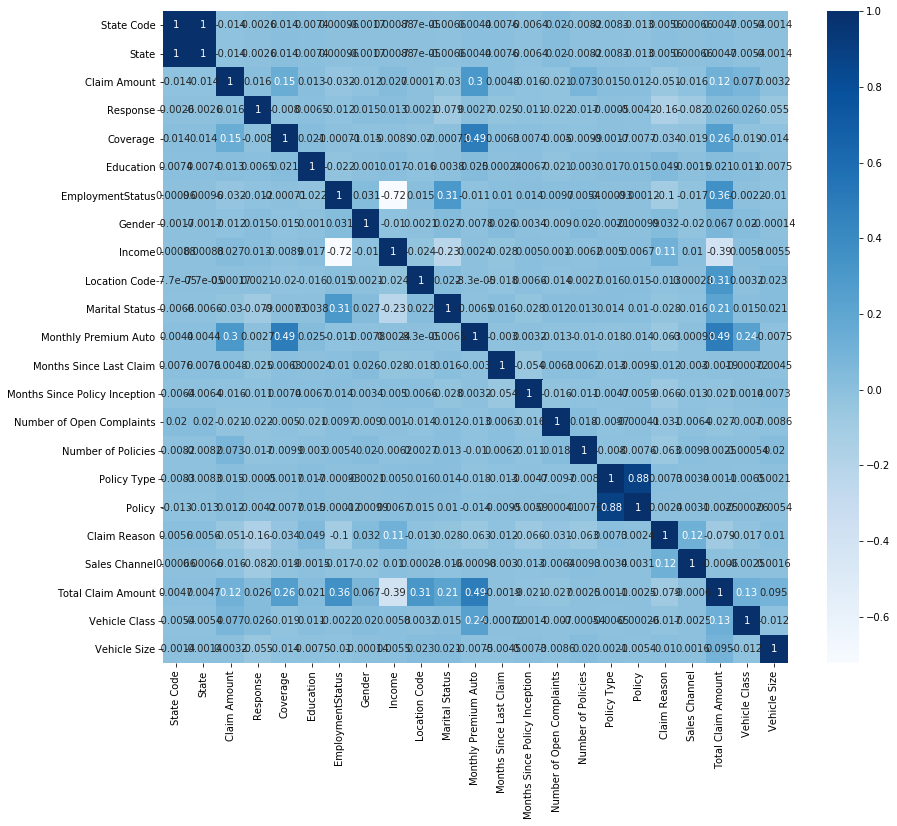

In [70]:
plt.figure(figsize=(14,12))
sns.heatmap(df2n.corr(),cmap='Blues',annot=True)

In [71]:
df2n.skew()
##Checking the Skewness

State Code                       0.019194
State                            0.019194
Claim Amount                     1.848796
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             1.330466
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Total Claim Amount               0.709643
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

In [72]:
df2n['Monthly Premium Auto']=np.log(df2n['Monthly Premium Auto'])

In [73]:
df2n.skew()

State Code                       0.019194
State                            0.019194
Claim Amount                     1.848796
Response                         2.030625
Coverage                         1.080580
Education                        0.337866
EmploymentStatus                 0.844023
Gender                           0.044411
Income                           0.282827
Location Code                    0.012291
Marital Status                  -0.099961
Monthly Premium Auto             0.690593
Months Since Last Claim          0.283606
Months Since Policy Inception    0.049470
Number of Open Complaints        2.574570
Number of Policies               1.226531
Policy Type                     -0.459843
Policy                          -0.415012
Claim Reason                     0.725402
Sales Channel                    0.503296
Total Claim Amount               0.709643
Vehicle Class                    0.403978
Vehicle Size                     0.071461
dtype: float64

# Model Training 

In [74]:
df3=df2n.copy()

In [75]:
x=df3.drop('Claim Amount',axis=1)
y=df3['Claim Amount']

In [76]:
x.shape,y.shape

((8470, 22), (8470,))

In [77]:
s=StandardScaler()

In [78]:
x=s.fit_transform(x)

In [79]:
from sklearn.decomposition import PCA

In [80]:
xpca=PCA(n_components=10)
x=xpca.fit_transform(x)

In [81]:
# Optimising the seed value(random state)
# the output values are continous. so we have to comsider the regression algorithms here
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lm=LinearRegression(normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum score corresponding to random state',finalr,'is',maxr)

score correspondng to random state 41 is: 0.07524327899181638
score correspondng to random state 42 is: 0.07413123515967446
score correspondng to random state 43 is: 0.07123031251417944
score correspondng to random state 44 is: 0.07416640236349437
score correspondng to random state 45 is: 0.07353111725763695
score correspondng to random state 46 is: 0.07221960437546193
score correspondng to random state 47 is: 0.07621263823066393
score correspondng to random state 48 is: 0.07354951504168639
score correspondng to random state 49 is: 0.0767167648622672
score correspondng to random state 50 is: 0.07369018926989934
score correspondng to random state 51 is: 0.08414641020741664
score correspondng to random state 52 is: 0.08016251147318909
score correspondng to random state 53 is: 0.07647681895760794
score correspondng to random state 54 is: 0.08152042895912592
score correspondng to random state 55 is: 0.08115635884845607
score correspondng to random state 56 is: 0.07791882467389533
score cor

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=0.3)

In [83]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [84]:
print('Model_score:',lm.score(x_train,y_train))

Model_score: 0.08660021843103116


In [85]:
cvs=cross_val_score(lm,x,y,cv=10)
print(score.mean())

0.08427383139076583


In [86]:
print('error:')   ## calculating the error
print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 364.54540828735986
mean squared error: 253595.61046753803
root mean squared error: 503.58277419659424


In [87]:
lm.coef_

array([38.59226729,  4.47994678, -0.86220606, 94.88594489, 13.48446281,
       13.82435845, 12.54066411, 20.27960108, 10.83886243, 10.05503657])

In [88]:
# trying to check overfitting/underfitting of the model and chosing the hyperparameter
ls=Lasso()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0]}
grid=GridSearchCV(ls,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.07137090888600958
{'alpha': 1.0}


In [89]:
ls=Lasso(alpha=1.0)
ls.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [90]:
ls.score(x_train,y_train)

0.08656848830665487

In [91]:
rd=Ridge()
alphavalue={'alpha':[1.0,0.1,0.01,0.001,0]}
grid=GridSearchCV(rd,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1.0, 0.1, 0.01, 0.001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.07120577732546711
{'alpha': 1.0}


In [92]:
rd=Ridge(alpha=1.0)
rd.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
rd.score(x_train,y_train)

0.08660021760324188

In [94]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))
print(predr)
print('\n')

0.8864559594907022
[ 947.29532443 1155.52814578  763.9348816  ...  655.50510083 1163.66983487
  592.03637086]




In [95]:
# so as we can observe, RandomForestRegressor is providing the highest model score. so we save this model with this.

Saving the Model 

In [96]:
joblib.dump(rf,'rfinsuranceclaim.obj')

['rfinsuranceclaim.obj']

# Sub-Project- 2(Predicting Insurance Fraud)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import joblib
from sklearn.metrics import roc_curve
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [98]:
data2=pd.read_csv('autofraud.csv',parse_dates=['policy_bind_date','incident_date'],na_values='?')
data2
# The purpose of an Insurance is to provide protection against the risk of any financial loss. 
# Insurance is a form of risk management in which an insurer agrees to take the risk of the insured entity against future events, uncertain loss due to Tsunami, earthquake or damage against the vehicle or personal property. 
# Here you will be provided with Automobile insurance claim dataset.
# One has to predict the insurance fraud  in the Automobile insurance dataset.

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,NaN,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-05-01,IL,100/300,1000,1436.79,0,608177,...,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [99]:
df=pd.DataFrame(data=data2)
df.shape

(1000, 40)

# Data Pre-Processing

In [100]:
df.info()
# missing values are observed in column 'collision type', 'property damage' & 'police report available'
# the column 'c39' doesnt have any values at all
# all objcet columns to be converted to numerical one

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [101]:
df1=df.drop('_c39',axis=1)
df1.shape # dropping of column

(1000, 39)

In [102]:
df1['collision_type'].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

In [103]:
imp=SimpleImputer(strategy='most_frequent')
df1['collision_type']=imp.fit_transform(df1['collision_type'].values.reshape(-1,1))

In [104]:
df1['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [105]:
df1['property_damage'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [107]:
df3=df1.copy()

In [108]:
df3.dropna(axis=0,inplace=True)
df3.shape

(421, 39)

In [110]:
df3['policy_state'].unique()

array(['OH', 'IL', 'IN'], dtype=object)

In [111]:
df3['policy_state']=le.fit_transform(df3['policy_state'])
for i in df3['policy_state'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

2=['OH']
0=['IL']
1=['IN']


In [112]:
df3['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [113]:
df3['policy_csl']=le.fit_transform(df3['policy_csl'])
for i in df3['policy_csl'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['250/500']
0=['100/300']
2=['500/1000']


In [114]:
df3['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [115]:
df3['insured_sex']=le.fit_transform(df3['insured_sex'])
for i in df3['insured_sex'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['MALE']
0=['FEMALE']


In [116]:
df3['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'High School', 'College', 'Masters',
       'JD'], dtype=object)

In [117]:
df3['insured_education_level']=le.fit_transform(df3['insured_education_level'])
for i in df3['insured_education_level'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

4=['MD']
6=['PhD']
0=['Associate']
2=['High School']
1=['College']
5=['Masters']
3=['JD']


In [118]:
df3['insured_occupation'].unique()

array(['craft-repair', 'sales', 'tech-support', 'other-service',
       'exec-managerial', 'protective-serv', 'armed-forces',
       'machine-op-inspct', 'transport-moving', 'prof-specialty',
       'adm-clerical', 'priv-house-serv', 'handlers-cleaners',
       'farming-fishing'], dtype=object)

In [119]:
df3['insured_occupation']=le.fit_transform(df3['insured_occupation'])
for i in df3['insured_occupation'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

2=['craft-repair']
11=['sales']
12=['tech-support']
7=['other-service']
3=['exec-managerial']
10=['protective-serv']
1=['armed-forces']
6=['machine-op-inspct']
13=['transport-moving']
9=['prof-specialty']
0=['adm-clerical']
8=['priv-house-serv']
5=['handlers-cleaners']
4=['farming-fishing']


In [120]:
df3['insured_relationship'].unique()

array(['husband', 'own-child', 'unmarried', 'other-relative', 'wife',
       'not-in-family'], dtype=object)

In [121]:
df3['insured_relationship']=le.fit_transform(df3['insured_relationship'])
for i in df3['insured_relationship'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['husband']
3=['own-child']
4=['unmarried']
2=['other-relative']
5=['wife']
1=['not-in-family']


In [122]:
df3['insured_hobbies'].unique()

array(['sleeping', 'board-games', 'bungie-jumping', 'golf', 'skydiving',
       'reading', 'movies', 'yachting', 'paintball', 'kayaking', 'polo',
       'basketball', 'hiking', 'video-games', 'chess', 'cross-fit',
       'exercise', 'dancing', 'camping', 'base-jumping'], dtype=object)

In [123]:
df3['insured_hobbies']=le.fit_transform(df3['insured_hobbies'])
for i in df3['insured_hobbies'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

17=['sleeping']
2=['board-games']
3=['bungie-jumping']
9=['golf']
16=['skydiving']
15=['reading']
12=['movies']
19=['yachting']
13=['paintball']
11=['kayaking']
14=['polo']
1=['basketball']
10=['hiking']
18=['video-games']
5=['chess']
6=['cross-fit']
8=['exercise']
7=['dancing']
4=['camping']
0=['base-jumping']


In [124]:
df3['incident_type'].unique()

array(['Single Vehicle Collision', 'Multi-vehicle Collision',
       'Vehicle Theft', 'Parked Car'], dtype=object)

In [125]:
df3['incident_type']=le.fit_transform(df3['incident_type'])
for i in df3['incident_type'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

2=['Single Vehicle Collision']
0=['Multi-vehicle Collision']
3=['Vehicle Theft']
1=['Parked Car']


In [126]:
df3['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [127]:
df3['collision_type']=le.fit_transform(df3['collision_type'])
for i in df3['collision_type'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

2=['Side Collision']
1=['Rear Collision']
0=['Front Collision']


In [128]:
df3['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [129]:
df3['incident_severity']=le.fit_transform(df3['incident_severity'])
for i in df3['incident_severity'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

0=['Major Damage']
1=['Minor Damage']
2=['Total Loss']
3=['Trivial Damage']


In [130]:
df3['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Ambulance', 'Other'], dtype=object)

In [131]:
df3['authorities_contacted']=le.fit_transform(df3['authorities_contacted'])
for i in df3['authorities_contacted'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

4=['Police']
2=['None']
1=['Fire']
0=['Ambulance']
3=['Other']


In [132]:
df3['incident_state'].unique()

array(['SC', 'NY', 'WV', 'VA', 'OH', 'PA', 'NC'], dtype=object)

In [133]:
df3['incident_state']=le.fit_transform(df3['incident_state'])
for i in df3['incident_state'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

4=['SC']
1=['NY']
6=['WV']
5=['VA']
2=['OH']
3=['PA']
0=['NC']


In [134]:
df3['incident_city'].unique()

array(['Columbus', 'Arlington', 'Springfield', 'Northbend', 'Hillsdale',
       'Northbrook', 'Riverwood'], dtype=object)

In [135]:
df3['incident_city']=le.fit_transform(df3['incident_city'])
for i in df3['incident_city'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['Columbus']
0=['Arlington']
6=['Springfield']
3=['Northbend']
2=['Hillsdale']
4=['Northbrook']
5=['Riverwood']


In [136]:
df3['incident_location'].unique()

array(['9935 4th Drive', '7121 Francis Lane', '3041 3rd Ave',
       '8973 Washington St', '4872 Rock Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '4546 Tree St', '3842 Solo Ridge',
       '2526 Embaracadero Ave', '2502 Apache Hwy', '3418 Texas Lane',
       '2533 Elm St', '3220 Rock Drive', '2100 Francis Drive',
       '6092 5th Ave', '3540 Maple St', '3104 Sky Drive',
       '6676 Tree Lane', '3221 Solo Ridge', '6660 MLK Drive',
       '8907 Tree Ave', '5821 2nd St', '6723 Best Drive',
       '5418 Britain Ave', '4296 Pine Hwy', '2299 1st St',
       '7459 Flute St', '3567 4th Drive', '2457 Washington Ave',
       '1269 Flute Drive', '1218 Sky Hwy', '9169 Pine Ridge',
       '8538 Texas Lane', '5783 Oak Ave', '6751 Pine Ridge',
       '2324 Texas Ridge', '7923 Elm Ave', '4755 Best Lane',
       '5053 Tree Drive', '2078 3rd Ave', '7877 Sky Lane', '3087 Oak Hwy',
       '5124 Maple St', '2333 Maple Lane', '5540 Sky St',
 

In [137]:
df3['incident_location']=le.fit_transform(df3['incident_location'])
for i in df3['incident_location'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

419=['9935 4th Drive']
275=['7121 Francis Lane']
93=['3041 3rd Ave']
366=['8973 Washington St']
175=['4872 Rock Ridge']
227=['5971 5th Hwy']
257=['6655 5th Drive']
254=['6582 Elm Lane']
267=['6851 3rd Drive']
394=['9573 Weaver Ave']
163=['4546 Tree St']
138=['3842 Solo Ridge']
74=['2526 Embaracadero Ave']
72=['2502 Apache Hwy']
113=['3418 Texas Lane']
75=['2533 Elm St']
104=['3220 Rock Drive']
57=['2100 Francis Drive']
229=['6092 5th Ave']
121=['3540 Maple St']
98=['3104 Sky Drive']
259=['6676 Tree Lane']
105=['3221 Solo Ridge']
258=['6660 MLK Drive']
360=['8907 Tree Ave']
220=['5821 2nd St']
261=['6723 Best Drive']
197=['5418 Britain Ave']
153=['4296 Pine Hwy']
63=['2299 1st St']
289=['7459 Flute St']
123=['3567 4th Drive']
70=['2457 Washington Ave']
10=['1269 Flute Drive']
6=['1218 Sky Hwy']
377=['9169 Pine Ridge']
344=['8538 Texas Lane']
217=['5783 Oak Ave']
265=['6751 Pine Ridge']
64=['2324 Texas Ridge']
319=['7923 Elm Ave']
172=['4755 Best Lane']
185=['5053 Tree Drive']
56=['2078 

342=['8492 Andromedia Ridge']
14=['1353 Washington St']
213=['5769 Texas Lane']
83=['2849 Pine Drive']
329=['8125 Texas Ridge']
24=['1578 5th Lane']
18=['1472 4th Drive']
277=['7144 Andromedia St']
420=['9988 Rock Ridge']
295=['7544 Washington Ave']
279=['7201 Washington Ave']
354=['8805 Cherokee Drive']
206=['5630 1st Drive']
196=['5383 Maple Drive']
343=['8524 Pine Lane']
339=['8456 1st Ave']
126=['3639 Flute Hwy']
317=['7900 Sky Hwy']
311=['7835 Cherokee Hwy']
380=['9278 Francis Ridge']
101=['3171 Andromedia Lane']
160=['4477 5th Ave']
291=['7495 Washington Ave']
268=['6888 Elm Ridge']
256=['6638 Tree Drive']
210=['5678 Lincoln Drive']
161=['4496 Pine Lane']
356=['8845 5th Ave']
384=['9317 Apache Ave']
4=['1173 Andromedia Ave']
322=['7937 Weaver Ridge']
82=['2823 Weaver Lane']
300=['7583 Washington Ave']
297=['7552 3rd St']
30=['1654 Pine St']
228=['6058 Andromedia Hwy']
117=['3447 Solo Ave']
321=['7930 Texas Ave']
240=['6357 Texas Lane']
385=['9322 Rock Hwy']
176=['4885 Oak Lane']


In [138]:
df3['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [139]:
df3['property_damage']=le.fit_transform(df3['property_damage'])

In [140]:
df3['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [141]:
df3['police_report_available']=le.fit_transform(df3['police_report_available'])
for i in df3['police_report_available'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['YES']
0=['NO']


In [142]:
df3['auto_make'].unique()

array(['Saab', 'Dodge', 'Accura', 'Toyota', 'Audi', 'Suburu', 'Ford',
       'BMW', 'Mercedes', 'Chevrolet', 'Honda', 'Nissan', 'Volkswagen',
       'Jeep'], dtype=object)

In [143]:
df3['auto_make']=le.fit_transform(df3['auto_make'])
for i in df3['auto_make'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))


10=['Saab']
4=['Dodge']
0=['Accura']
12=['Toyota']
1=['Audi']
11=['Suburu']
5=['Ford']
2=['BMW']
8=['Mercedes']
3=['Chevrolet']
6=['Honda']
9=['Nissan']
13=['Volkswagen']
7=['Jeep']


In [144]:
df3['auto_model']=le.fit_transform(df3['auto_model'])
for i in df3['auto_model'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['92x']
30=['RAM']
31=['RSX']
3=['95']
9=['Camry']
4=['A3']
18=['Highlander']
27=['Neon']
23=['MDX']
21=['Legacy']
33=['TL']
15=['Forrestor']
13=['Escape']
0=['3 Series']
7=['C300']
12=['E400']
14=['F150']
32=['Silverado']
2=['93']
6=['Accord']
22=['M5']
5=['A5']
38=['X6']
10=['Civic']
25=['Malibu']
16=['Fusion']
26=['Maxima']
20=['Jetta']
37=['X5']
24=['ML350']
29=['Pathfinder']
35=['Ultima']
28=['Passat']
36=['Wrangler']
34=['Tahoe']
8=['CRV']
19=['Impreza']
11=['Corolla']
17=['Grand Cherokee']


In [145]:
df3['fraud_reported']=le.fit_transform(df3['fraud_reported'])
for i in df3['fraud_reported'].unique():
    print('{0}={1}'.format(i,le.inverse_transform([i])))

1=['Y']
0=['N']


{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44fc36fc8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44fc117c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44fc40b88>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44fc40ec8>}

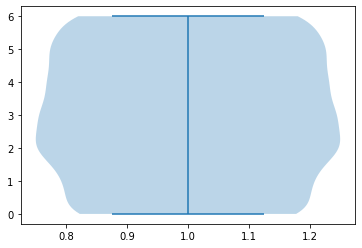

In [148]:
plt.violinplot(df3['insured_education_level']) # checking the education level of the applicants of the dataset

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f450359a88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f4503592c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f45035c708>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f4503cc548>}

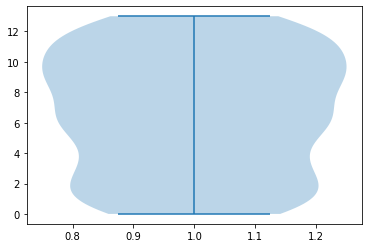

In [149]:
plt.violinplot(df3['insured_occupation']) # checking the occupation of the applicants 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44fcd4848>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44fcd45c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44fcdb948>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44fcdbe48>}

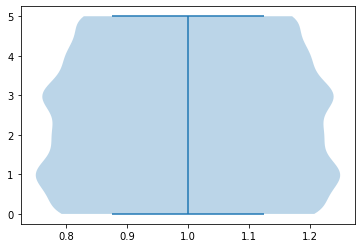

In [150]:
plt.violinplot(df3['insured_relationship']) # checking the relatioship status of the applicants 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44fd0e148>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44fd38ac8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44fd41e08>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44fd43548>}

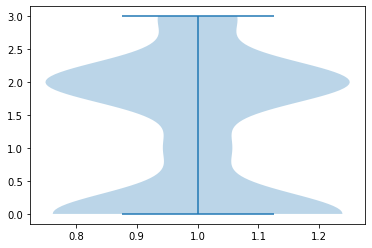

In [151]:
plt.violinplot(df3['incident_type']) # 'single vehicle collision' & 'multi vehicle collision' cases are more 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44fdaa2c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44fda2f08>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44fdae3c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44fdaeac8>}

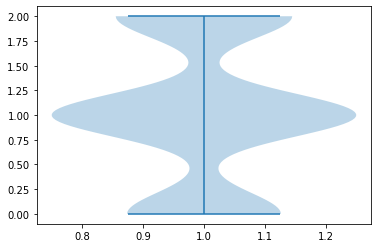

In [152]:
plt.violinplot(df3['collision_type']) # Rear collision cases are more 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44fe19508>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44fe19288>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44fe20608>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44fe20d08>}

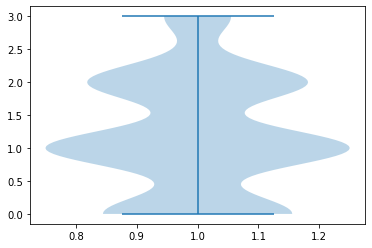

In [153]:
plt.violinplot(df3['incident_severity']) # 'minor damage' cases are more

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44fe86248>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44fe7df88>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44fe8a3c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44fe8aac8>}

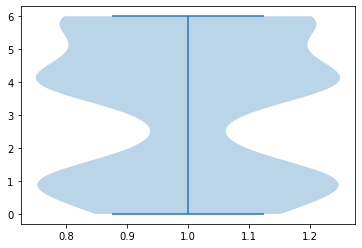

In [154]:
plt.violinplot(df3['incident_state']) # state 'PA' & 'OH' have reported least number of cases

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f44feef548>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f44feef2c8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f44fef56c8>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f44fef5dc8>}

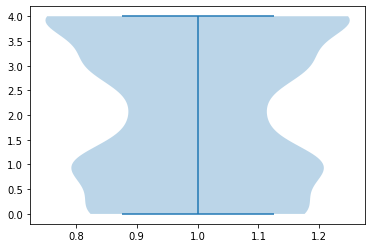

In [155]:
plt.violinplot(df3['authorities_contacted']) # most of the cases are reported to police

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f4510c3808>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f4510c3588>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f4510cb988>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f4510cbe88>}

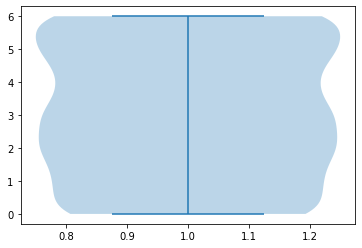

In [156]:
plt.violinplot(df3['incident_city']) # checking cases reported among various cities 

{'bodies': [<matplotlib.collections.PolyCollection at 0x1f451134388>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f45112cfc8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f451138508>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f451138c08>}

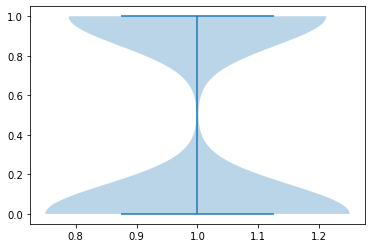

In [157]:
plt.violinplot(df3['property_damage'])


{'bodies': [<matplotlib.collections.PolyCollection at 0x1f451196d48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1f451196ac8>,
 'cmins': <matplotlib.collections.LineCollection at 0x1f45119fe48>,
 'cbars': <matplotlib.collections.LineCollection at 0x1f4511a2588>}

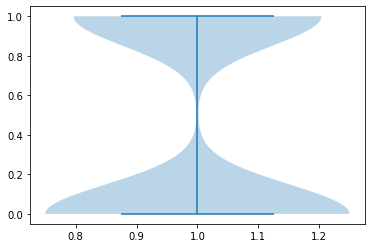

In [158]:
plt.violinplot(df3['police_report_available'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f451209b88>,
 'caps': [<matplotlib.lines.Line2D at 0x1f45120eb48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f451205fc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f451212ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f451212bc8>],
 'means': []}

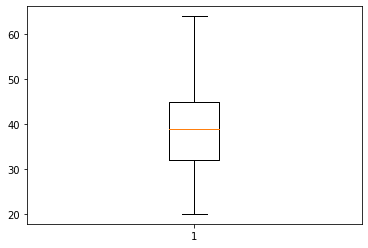

In [159]:
plt.boxplot(df3['age']) # canidates age ranges between 35 to 45

{'whiskers': [<matplotlib.lines.Line2D at 0x1f451271588>,
 'caps': [<matplotlib.lines.Line2D at 0x1f451271e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4512508c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f451274dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f451279c48>],
 'means': []}

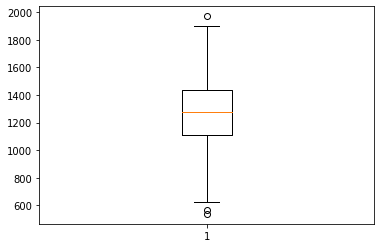

In [160]:
plt.boxplot(df3['policy_annual_premium']) # premium amount ranges between 1200 to 1400 units 

{'whiskers': [<matplotlib.lines.Line2D at 0x1f4512ddfc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f4512e1f48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f4512be2c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f4512e5ec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f4512e5fc8>],
 'means': []}

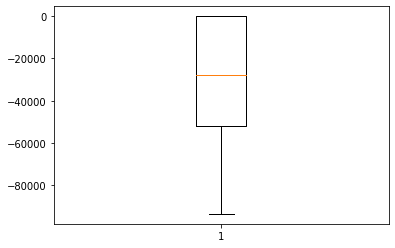

In [161]:
plt.boxplot(df3['capital-loss']) # checking capital loss reported

{'whiskers': [<matplotlib.lines.Line2D at 0x1f456b53cc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f456b56c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f456b35048>],
 'medians': [<matplotlib.lines.Line2D at 0x1f456b5cbc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f456b5ccc8>],
 'means': []}

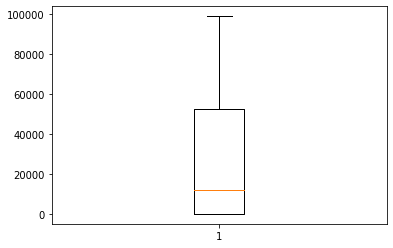

In [162]:
plt.boxplot(df3['capital-gains']) # checking capital gains reported

# Bivariate Analysis 

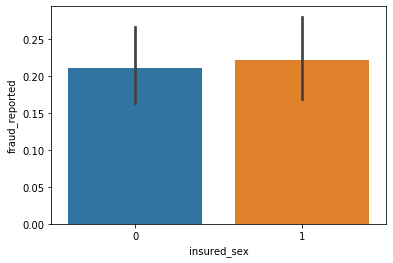

In [163]:
sns.barplot(x='insured_sex',y='fraud_reported',data=df3)
# checking fraud cases reported among different sex

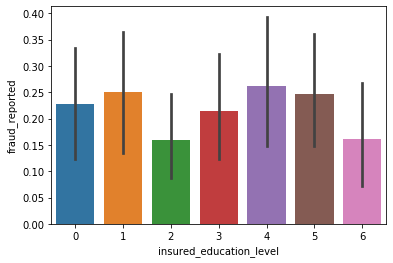

In [164]:
sns.barplot(x='insured_education_level',y='fraud_reported',data=df3)
# checking fraud cases reported among candidates with various education level

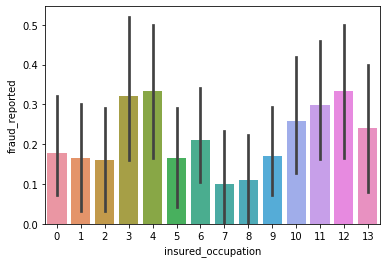

In [165]:
sns.barplot(x='insured_occupation',y='fraud_reported',data=df3)
# checking occupation of candidates reporting fraud cases. 

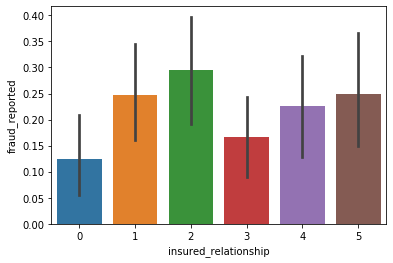

In [166]:
sns.barplot(x='insured_relationship',y='fraud_reported',data=df3)
# cases are reported by the relatives of the insured also. here we can see 'own child' of insured are reporting most of number of cases

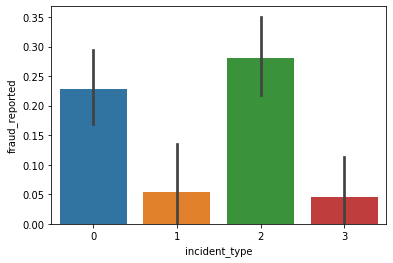

In [167]:
sns.barplot(x='incident_type',y='fraud_reported',data=df3)
# 'single' & 'multi' vehicle collision reports most number of fraud cases

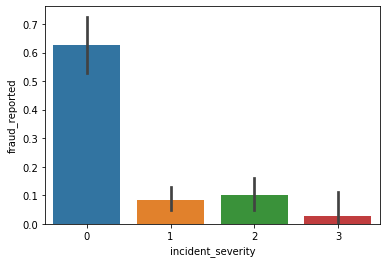

In [168]:
sns.barplot(x='incident_severity',y='fraud_reported',data=df3)
# 'minor damage' cases are more

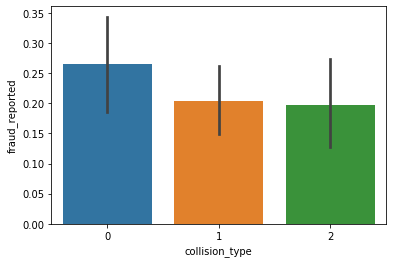

In [169]:
sns.barplot(x='collision_type',y='fraud_reported',data=df3)
# 'front collision cases' are the most. least is side collision 

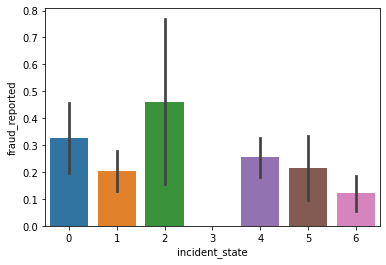

In [170]:
sns.barplot(x='incident_state',y='fraud_reported',data=df3)
# we can see 'PA reported' no fraud cases

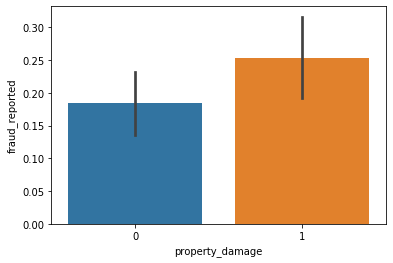

In [171]:
sns.barplot(x='property_damage',y='fraud_reported',data=df3)

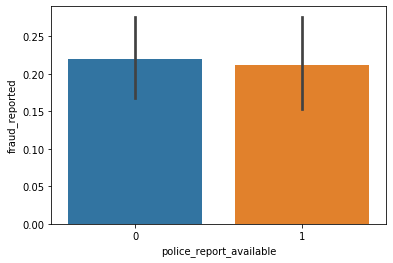

In [172]:
sns.barplot(x='police_report_available',y='fraud_reported',data=df3)

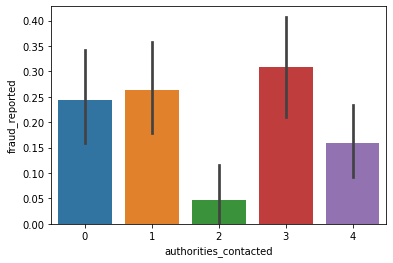

In [173]:
sns.barplot(x='authorities_contacted',y='fraud_reported',data=df3)

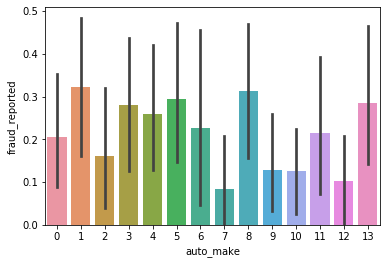

In [174]:
sns.barplot(x='auto_make',y='fraud_reported',data=df3)

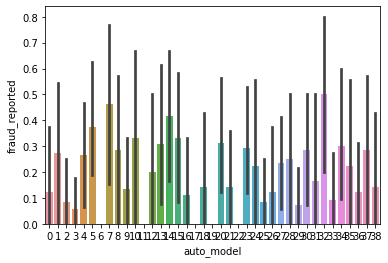

In [175]:
sns.barplot(x='auto_model',y='fraud_reported',data=df3)

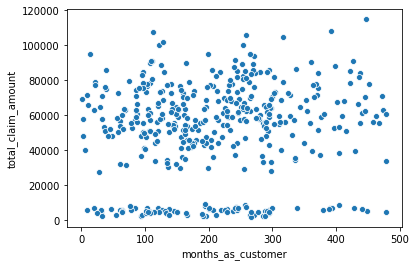

In [176]:
sns.scatterplot(x='months_as_customer',y='total_claim_amount',data=df3)

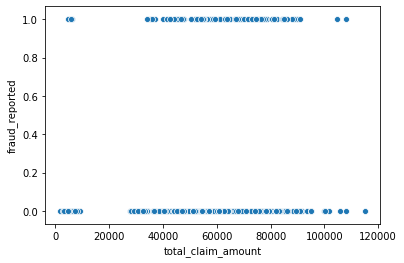

In [177]:
sns.scatterplot(x='total_claim_amount',y='fraud_reported',data=df3)

In [178]:
df3.skew()

months_as_customer             0.362847
age                            0.387424
policy_number                  0.004859
policy_state                  -0.134784
policy_csl                     0.097095
policy_deductable              0.403089
policy_annual_premium         -0.048146
umbrella_limit                 1.934064
insured_zip                    0.767293
insured_sex                    0.033378
insured_education_level       -0.013771
insured_occupation            -0.119107
insured_hobbies               -0.041452
insured_relationship           0.101548
capital-gains                  0.399312
capital-loss                  -0.330288
incident_type                  0.031863
collision_type                -0.053379
incident_severity              0.260453
authorities_contacted         -0.096096
incident_state                -0.145108
incident_city                 -0.026966
incident_location              0.000000
incident_hour_of_the_day      -0.112632
number_of_vehicles_involved    0.602955


In [180]:
dfn=df3.drop(['incident_date','policy_bind_date'],axis=1)
dfn.shape
# dropping columns which are not neccessary for training the model 

(421, 37)

In [181]:
z=np.abs(zscore(dfn))
print(np.where(z>3))

(array([ 23,  48, 172, 368, 391], dtype=int64), array([6, 7, 7, 7, 7], dtype=int64))


In [182]:
dfn1=dfn[(z<3).all(axis=1)]
dfn1.shape

(416, 37)

# Model Training 

In [183]:
x=dfn1.iloc[:,0:-1]
y=dfn1.iloc[:,-1]

In [184]:
sc=StandardScaler()
x=sc.fit_transform(x)
# scalling the regularization 

In [185]:
xpca=PCA(n_components=10)
x=xpca.fit_transform(x)
# since many of te columns are related to each other, lets applt PCA to come down with 10 columns so that model can trained better

In [186]:
x.shape,y.shape

((416, 10), (416,))

Applying Logistic Regression 

In [209]:
maxr=0
for i in range(41,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.3)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('maximum accuracy score corresponding to random state',finalr,'is',maxr)

accuracy score correspondng to random state 41 is: 0.76
accuracy score correspondng to random state 42 is: 0.808
accuracy score correspondng to random state 43 is: 0.768
accuracy score correspondng to random state 44 is: 0.824
accuracy score correspondng to random state 45 is: 0.776
accuracy score correspondng to random state 46 is: 0.768
accuracy score correspondng to random state 47 is: 0.768
accuracy score correspondng to random state 48 is: 0.792
accuracy score correspondng to random state 49 is: 0.816
accuracy score correspondng to random state 50 is: 0.76
accuracy score correspondng to random state 51 is: 0.752
accuracy score correspondng to random state 52 is: 0.832
accuracy score correspondng to random state 53 is: 0.744
accuracy score correspondng to random state 54 is: 0.728
accuracy score correspondng to random state 55 is: 0.784
accuracy score correspondng to random state 56 is: 0.792
accuracy score correspondng to random state 57 is: 0.776
accuracy score correspondng to ra

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= 62,test_size=0.3) 

In [215]:
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.84
[[99  1]
 [19  6]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       100
           1       0.86      0.24      0.38        25

    accuracy                           0.84       125
   macro avg       0.85      0.61      0.64       125
weighted avg       0.84      0.84      0.80       125

[1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
AxesSubplot(0.125,0.125;0.62x0.755)


Cross_val_score is:
 0.7934744268077601


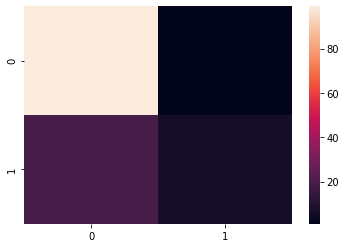

In [216]:
score=accuracy_score(y_test,pred)
matrix=confusion_matrix(y_test,pred)
report=classification_report(y_test,pred)
pred=lg.predict(x_test)
print(score)
print(matrix)
print(report)
print(pred)
print(sns.heatmap(matrix))
print('\n')
cvs=cross_val_score(lg,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

Applying DecisionTreeclassifier after fixing the hyper parameter

In [191]:
dtc=DecisionTreeClassifier()
param_grid={'criterion':['gini','entropy']}
grid=GridSearchCV(dtc,param_grid,scoring='accuracy',cv=20)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.6610714285714286
{'criterion': 'entropy'}


In [192]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.64
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       100
           1       0.14      0.16      0.15        25

    accuracy                           0.64       125
   macro avg       0.46      0.46      0.46       125
weighted avg       0.66      0.64      0.65       125

[[76 24]
 [21  4]]
Cross_val_score is:
 0.687389770723104


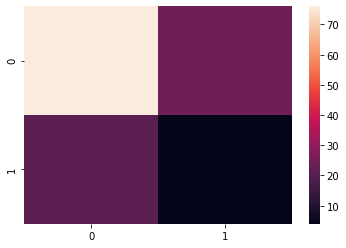

In [193]:
pred=dtc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(dtc,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

Applying GaussianMB

In [194]:
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

0.808
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       100
           1       0.55      0.24      0.33        25

    accuracy                           0.81       125
   macro avg       0.69      0.59      0.61       125
weighted avg       0.78      0.81      0.78       125

[[95  5]
 [19  6]]
Cross_val_score is:
 0.7763668430335098


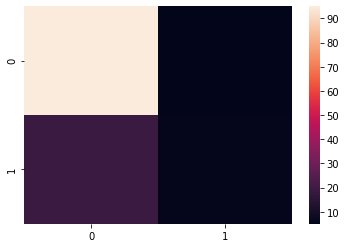

In [195]:
pred=gb.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(gb,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

Applying KNeighborsclassifier

In [196]:
knn= KNeighborsClassifier(n_neighbors=60)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=60, p=2,
                     weights='uniform')

0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       100
           1       0.00      0.00      0.00        25

    accuracy                           0.80       125
   macro avg       0.40      0.50      0.44       125
weighted avg       0.64      0.80      0.71       125

[[100   0]
 [ 25   0]]
Cross_val_score is:
 0.7835978835978837


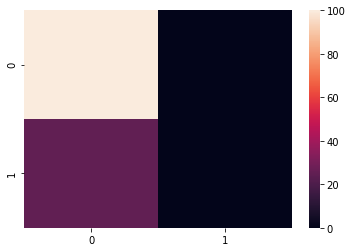

In [197]:
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(knn,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

Applying SupportVectorClassifier after fixing the hyper parameter

In [198]:
svc=SVC()
param_grid={'kernel':['ploy','rbf','linear']}
grid=GridSearchCV(svc,param_grid)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.7836488812392426
{'kernel': 'linear'}


In [199]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.8
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       100
           1       0.00      0.00      0.00        25

    accuracy                           0.80       125
   macro avg       0.40      0.50      0.44       125
weighted avg       0.64      0.80      0.71       125

[[100   0]
 [ 25   0]]


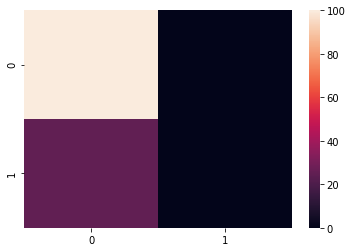

In [200]:
pred=svc.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))


Applying Ensemble Techniques

In [201]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.792
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       100
           1       0.43      0.12      0.19        25

    accuracy                           0.79       125
   macro avg       0.62      0.54      0.53       125
weighted avg       0.74      0.79      0.74       125

[[96  4]
 [22  3]]
Cross_val_score is:
 0.7764550264550265


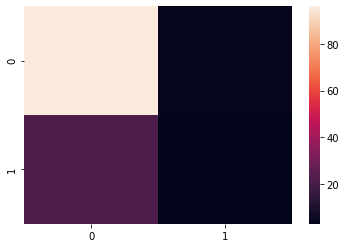

In [202]:
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(classification_report(y_test,predrf))
print(confusion_matrix(y_test,predrf))
sns.heatmap(confusion_matrix(y_test,predrf))
cvs=cross_val_score(rf,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

0.728
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       100
           1       0.29      0.24      0.26        25

    accuracy                           0.73       125
   macro avg       0.55      0.54      0.55       125
weighted avg       0.71      0.73      0.72       125

[[85 15]
 [19  6]]
Cross_val_score is:
 0.7356261022927689


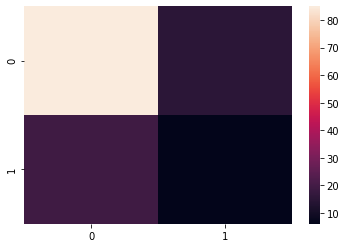

In [203]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))
sns.heatmap(confusion_matrix(y_test,pred))
cvs=cross_val_score(ad,x,y,cv=15,scoring='accuracy')
print('Cross_val_score is:\n',cvs.mean())

In [204]:
# As we can observe Logistic regression is providing accuracy score of 0.84
# As we can observe Knn is providing accuracy score of 0.80
# As we can observe dtc is providing accuracy score of 0.672
# As we can observe gb is providing accuracy score of 0.808
# As we can observe svc is providing accuracy score of 0.80
# As we can observe RandomForestClassifier  is providing accuracy score of 0.76
# As we can observe AdaboostClassifier is providing accuracy score of 0.728

In [205]:
# so we can save the svc to train the model and save it since its settled with hyper parameter.

Saving the model 

In [206]:
joblib.dump(svc,'svcfraud.obj')

['svcfraud.obj']

In [217]:
predrf## predicting the target

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])